In [7]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

# Cargar el archivo .cs8
file_path = '/home/javastral/Desktop/HackF/88108.cs8'
fs = 20000000

# Cargar el archivo como enteros con signo de 8 bits
def cargar_cs8(filename):
    data = np.fromfile(filename, dtype=np.int8)
    I = data[0::2]  # Muestras pares como parte real
    Q = data[1::2]  # Muestras impares como parte imaginaria
    señal_compleja = I + 1j * Q
    return señal_compleja, I, Q

IQ_data_raw, I, Q = cargar_cs8(file_path)
print("cs8 file, Done")

f_raw, Pxx_raw = sig.welch(IQ_data_raw, fs=20000, nperseg=1024, noverlap=0.5, return_onesided=False)
print("Welch scipy Done")

# Cargar datos procesados
data = np.loadtxt('/home/javastral/Desktop/GIT/GCPDS--trabajos-/C-code/BEAM-reconstruction-v2/psd_output.csv', delimiter=',', skiprows=1)
f_proc = data[:, 0]

Pxx_proc = data[:, 1]

# Desplazar el espectro
f_raw = np.fft.fftshift(f_raw)

f=np.linspace(88,108, len(Pxx_raw))

Pxx_raw = np.fft.fftshift(Pxx_raw)
#f_proc = np.fft.fftshift(f_proc)
#Pxx_proc = np.fft.fftshift(Pxx_proc)

cs8 file, Done
Welch scipy Done


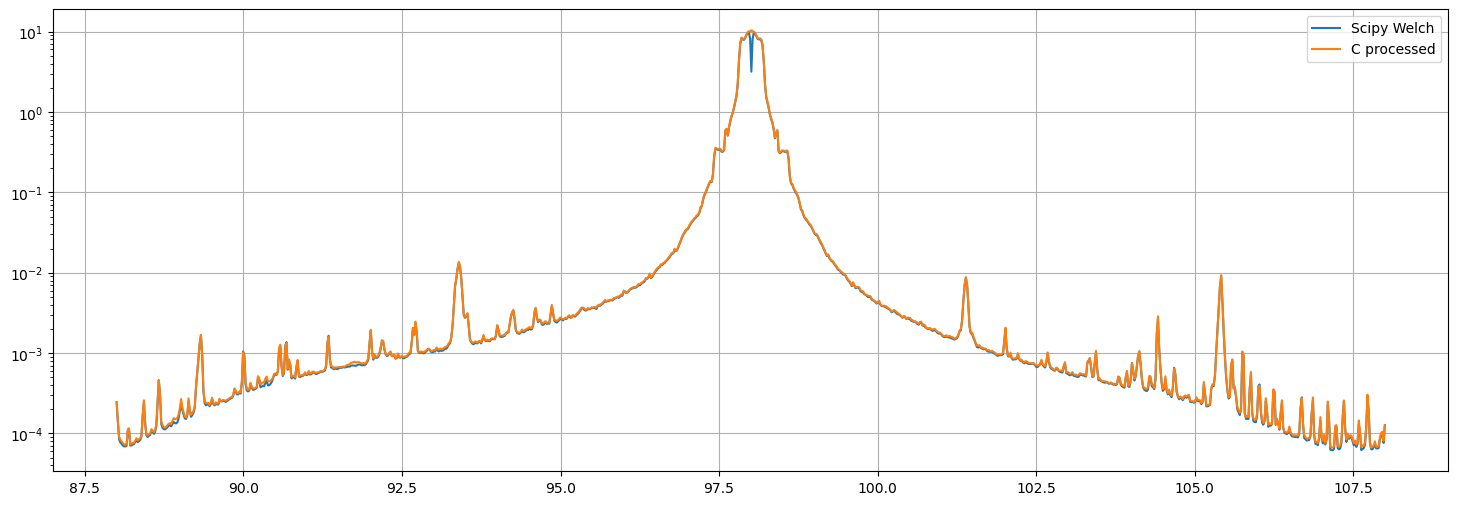

In [8]:
# Gráfico para los datos RAW
plt.figure(figsize=(18,6))
plt.semilogy(f, Pxx_raw, label='Scipy Welch')
plt.semilogy(f, Pxx_proc, label='C processed')
plt.legend()
plt.grid()
plt.show()